<a href="https://colab.research.google.com/github/Morioh/Heart-Disease-Analysis/blob/main/Heart_Disease_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading and Preprocessing of data

In [1]:
# Install the ucimlrepo package

!pip install ucimlrepo

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
from scipy.stats import zscore
import pandas as pd


In [3]:
# Import and access the dataset into your code

from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# metadata
print(heart_disease.metadata)

# variable information
print(heart_disease.variables)


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

In [4]:
# check the shape of the dataframe

heart_disease['data']['features'].shape

(303, 13)

In [5]:
# Inspect the Data

X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


In [6]:
print(X.info())        # Overview of data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
dtypes: float64(3), int64(10)
memory usage: 30.9 KB
None


In [7]:

print(X.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  299.000000   
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.672241   
std      0.994971   22.8750

In [8]:
# Check for missing values

print(X.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
dtype: int64


In [9]:
# Correction by imputation

imputer = SimpleImputer(strategy='mean')  # or 'median'
X_imputed = imputer.fit_transform(X)
X = pd.DataFrame(X_imputed, columns=X.columns)

In [10]:
# Correction verification

print(X.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64


In [11]:
# Outlier detection with Z-score

X_z = X.apply(zscore)  # Calculates z-scores for each column
outliers = (X_z > 3).sum()  # Identifies values with z-scores greater than 3
print("Outliers identified with Z-score method:", outliers)

Outliers identified with Z-score method: age         0
sex         0
cp          0
trestbps    2
chol        4
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     2
slope       0
ca          0
thal        0
dtype: int64


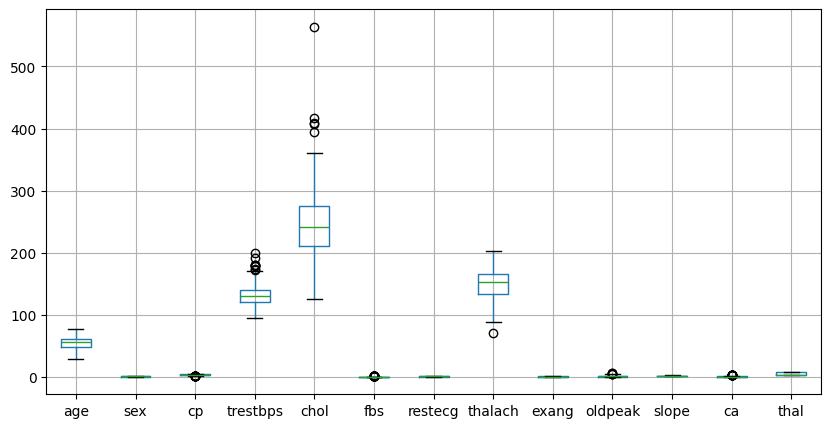

In [12]:
# Visualize with a box plot

plt.figure(figsize=(10, 5))
X.boxplot()
plt.show()

In [13]:
# Confirm with IQR method

Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = ((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).sum()
print("Outliers identified with IQR method:", outliers_iqr)

Outliers identified with IQR method: age          0
sex          0
cp          23
trestbps     9
chol         5
fbs         45
restecg      0
thalach      1
exang        0
oldpeak      5
slope        0
ca          20
thal         0
dtype: int64


In [14]:
# Feature standardization

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

## EDA

In [15]:
# check the shape of the dataframe

heart_disease['data']['features'].shape

(303, 13)

In [16]:
# Inspect the Data

X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.948726,0.686202,-2.251775,0.757525,-0.264900,2.394438,1.016684,0.017197,-0.696631,1.087338,2.274579,-0.723095,0.655818
1,1.392002,0.686202,0.877985,1.611220,0.760415,-0.417635,1.016684,-1.821905,1.435481,0.397182,0.649113,2.503851,-0.898522
2,1.392002,0.686202,0.877985,-0.665300,-0.342283,-0.417635,1.016684,-0.902354,1.435481,1.346147,0.649113,1.428203,1.173931
3,-1.932564,0.686202,-0.165268,-0.096170,0.063974,-0.417635,-0.996749,1.637359,-0.696631,2.122573,2.274579,-0.723095,-0.898522
4,-1.489288,-1.457296,-1.208521,-0.096170,-0.825922,-0.417635,1.016684,0.980537,-0.696631,0.310912,-0.976352,-0.723095,-0.898522


In [17]:

print(X.describe())    # Summary statistics for numerical columns

                age           sex            cp      trestbps          chol  \
count  3.030000e+02  3.030000e+02  3.030000e+02  3.030000e+02  3.030000e+02   
mean  -1.465641e-18 -2.931282e-17 -1.670831e-16  4.426236e-16  2.345026e-16   
std    1.001654e+00  1.001654e+00  1.001654e+00  1.001654e+00  1.001654e+00   
min   -2.819115e+00 -1.457296e+00 -2.251775e+00 -2.145037e+00 -2.334877e+00   
25%   -7.135564e-01 -1.457296e+00 -1.652679e-01 -6.652997e-01 -6.905030e-01   
50%    1.729945e-01  6.862024e-01 -1.652679e-01 -9.616980e-02 -1.101357e-01   
75%    7.270888e-01  6.862024e-01  8.779855e-01  4.729601e-01  5.476139e-01   
max    2.500191e+00  6.862024e-01  8.779855e-01  3.887739e+00  6.138485e+00   

                fbs       restecg       thalach         exang       oldpeak  \
count  3.030000e+02  3.030000e+02  3.030000e+02  3.030000e+02  3.030000e+02   
mean  -1.172513e-17 -1.172513e-17 -1.172513e-16 -9.086974e-17  2.345026e-17   
std    1.001654e+00  1.001654e+00  1.001654e+00  1.

In [18]:
# Target variable distribution

print(y.value_counts(normalize=True))  # Proportion of each class

num
0      0.541254
1      0.181518
2      0.118812
3      0.115512
4      0.042904
Name: proportion, dtype: float64


### Univariate Analysis

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

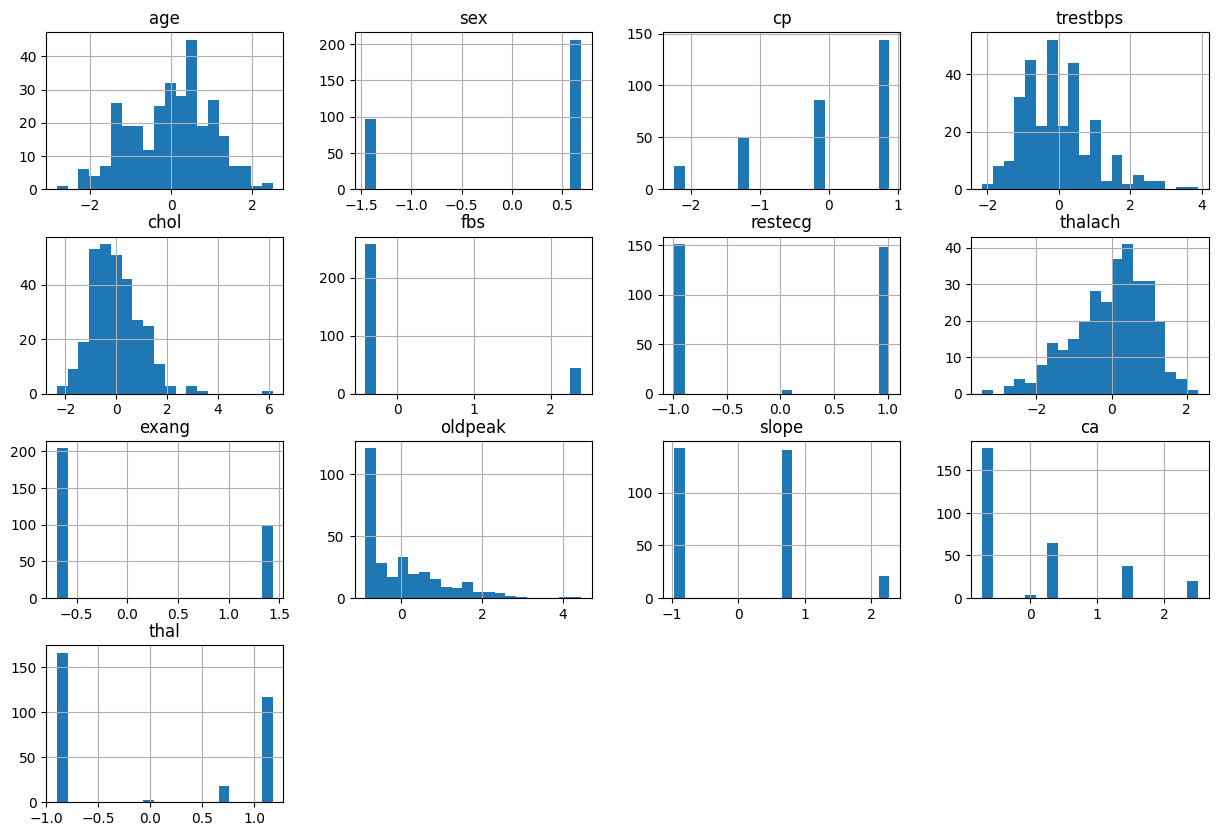

In [19]:
# Using histograms

X.hist(bins=20, figsize=(15, 10))

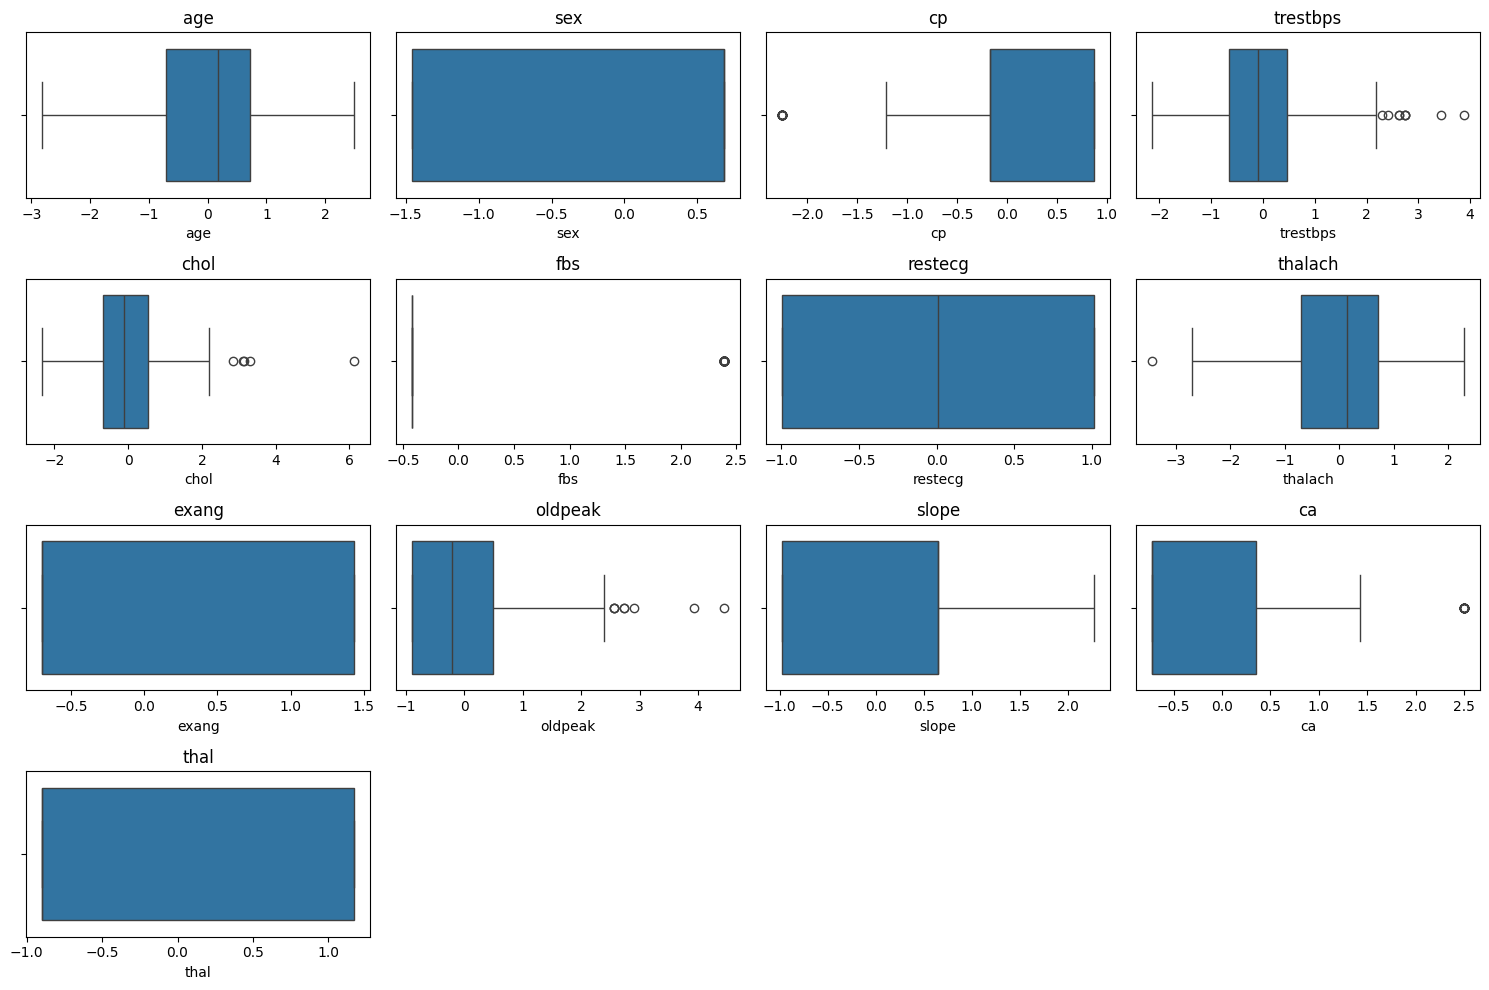

In [20]:
# Using box plots

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
for i, column in enumerate(X.columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=X[column])
    plt.title(column)
plt.tight_layout()

### Bivariate Analsis

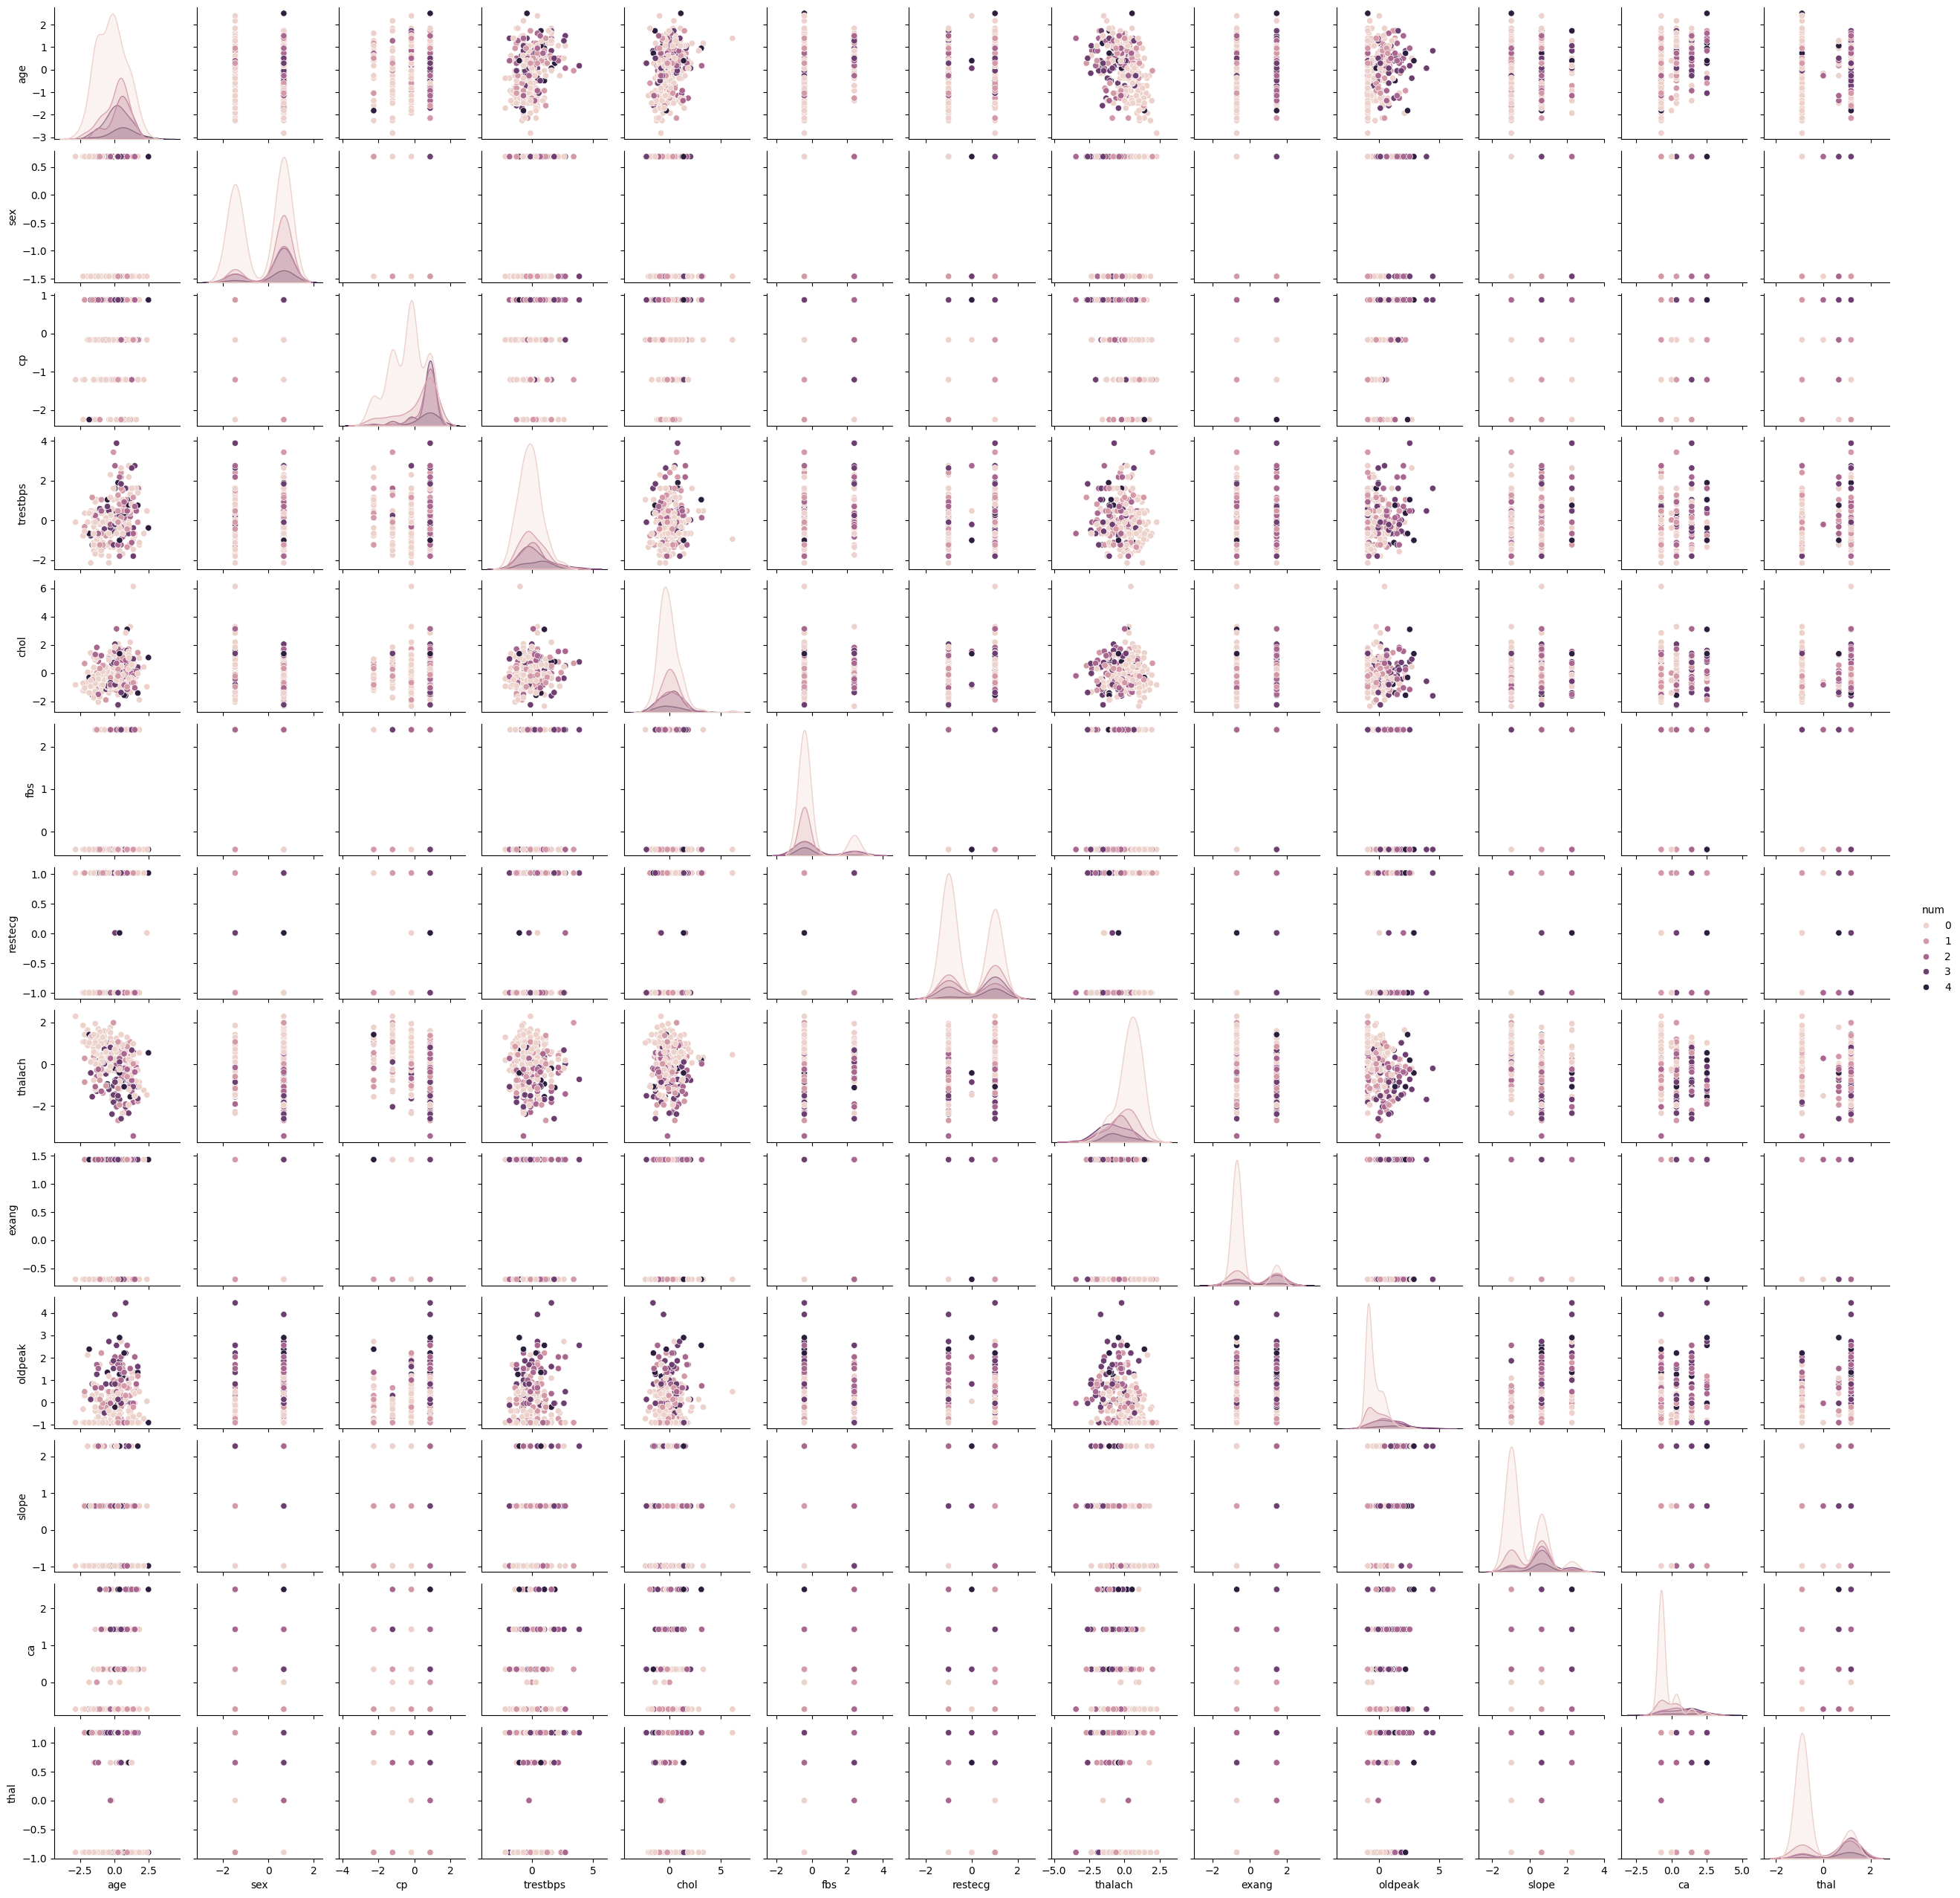

In [21]:
# Access target column directly

target_column = y.columns[0]  # Get the name
sns.pairplot(pd.concat([X, y], axis=1), hue=target_column, diag_kind='kde', height=2)

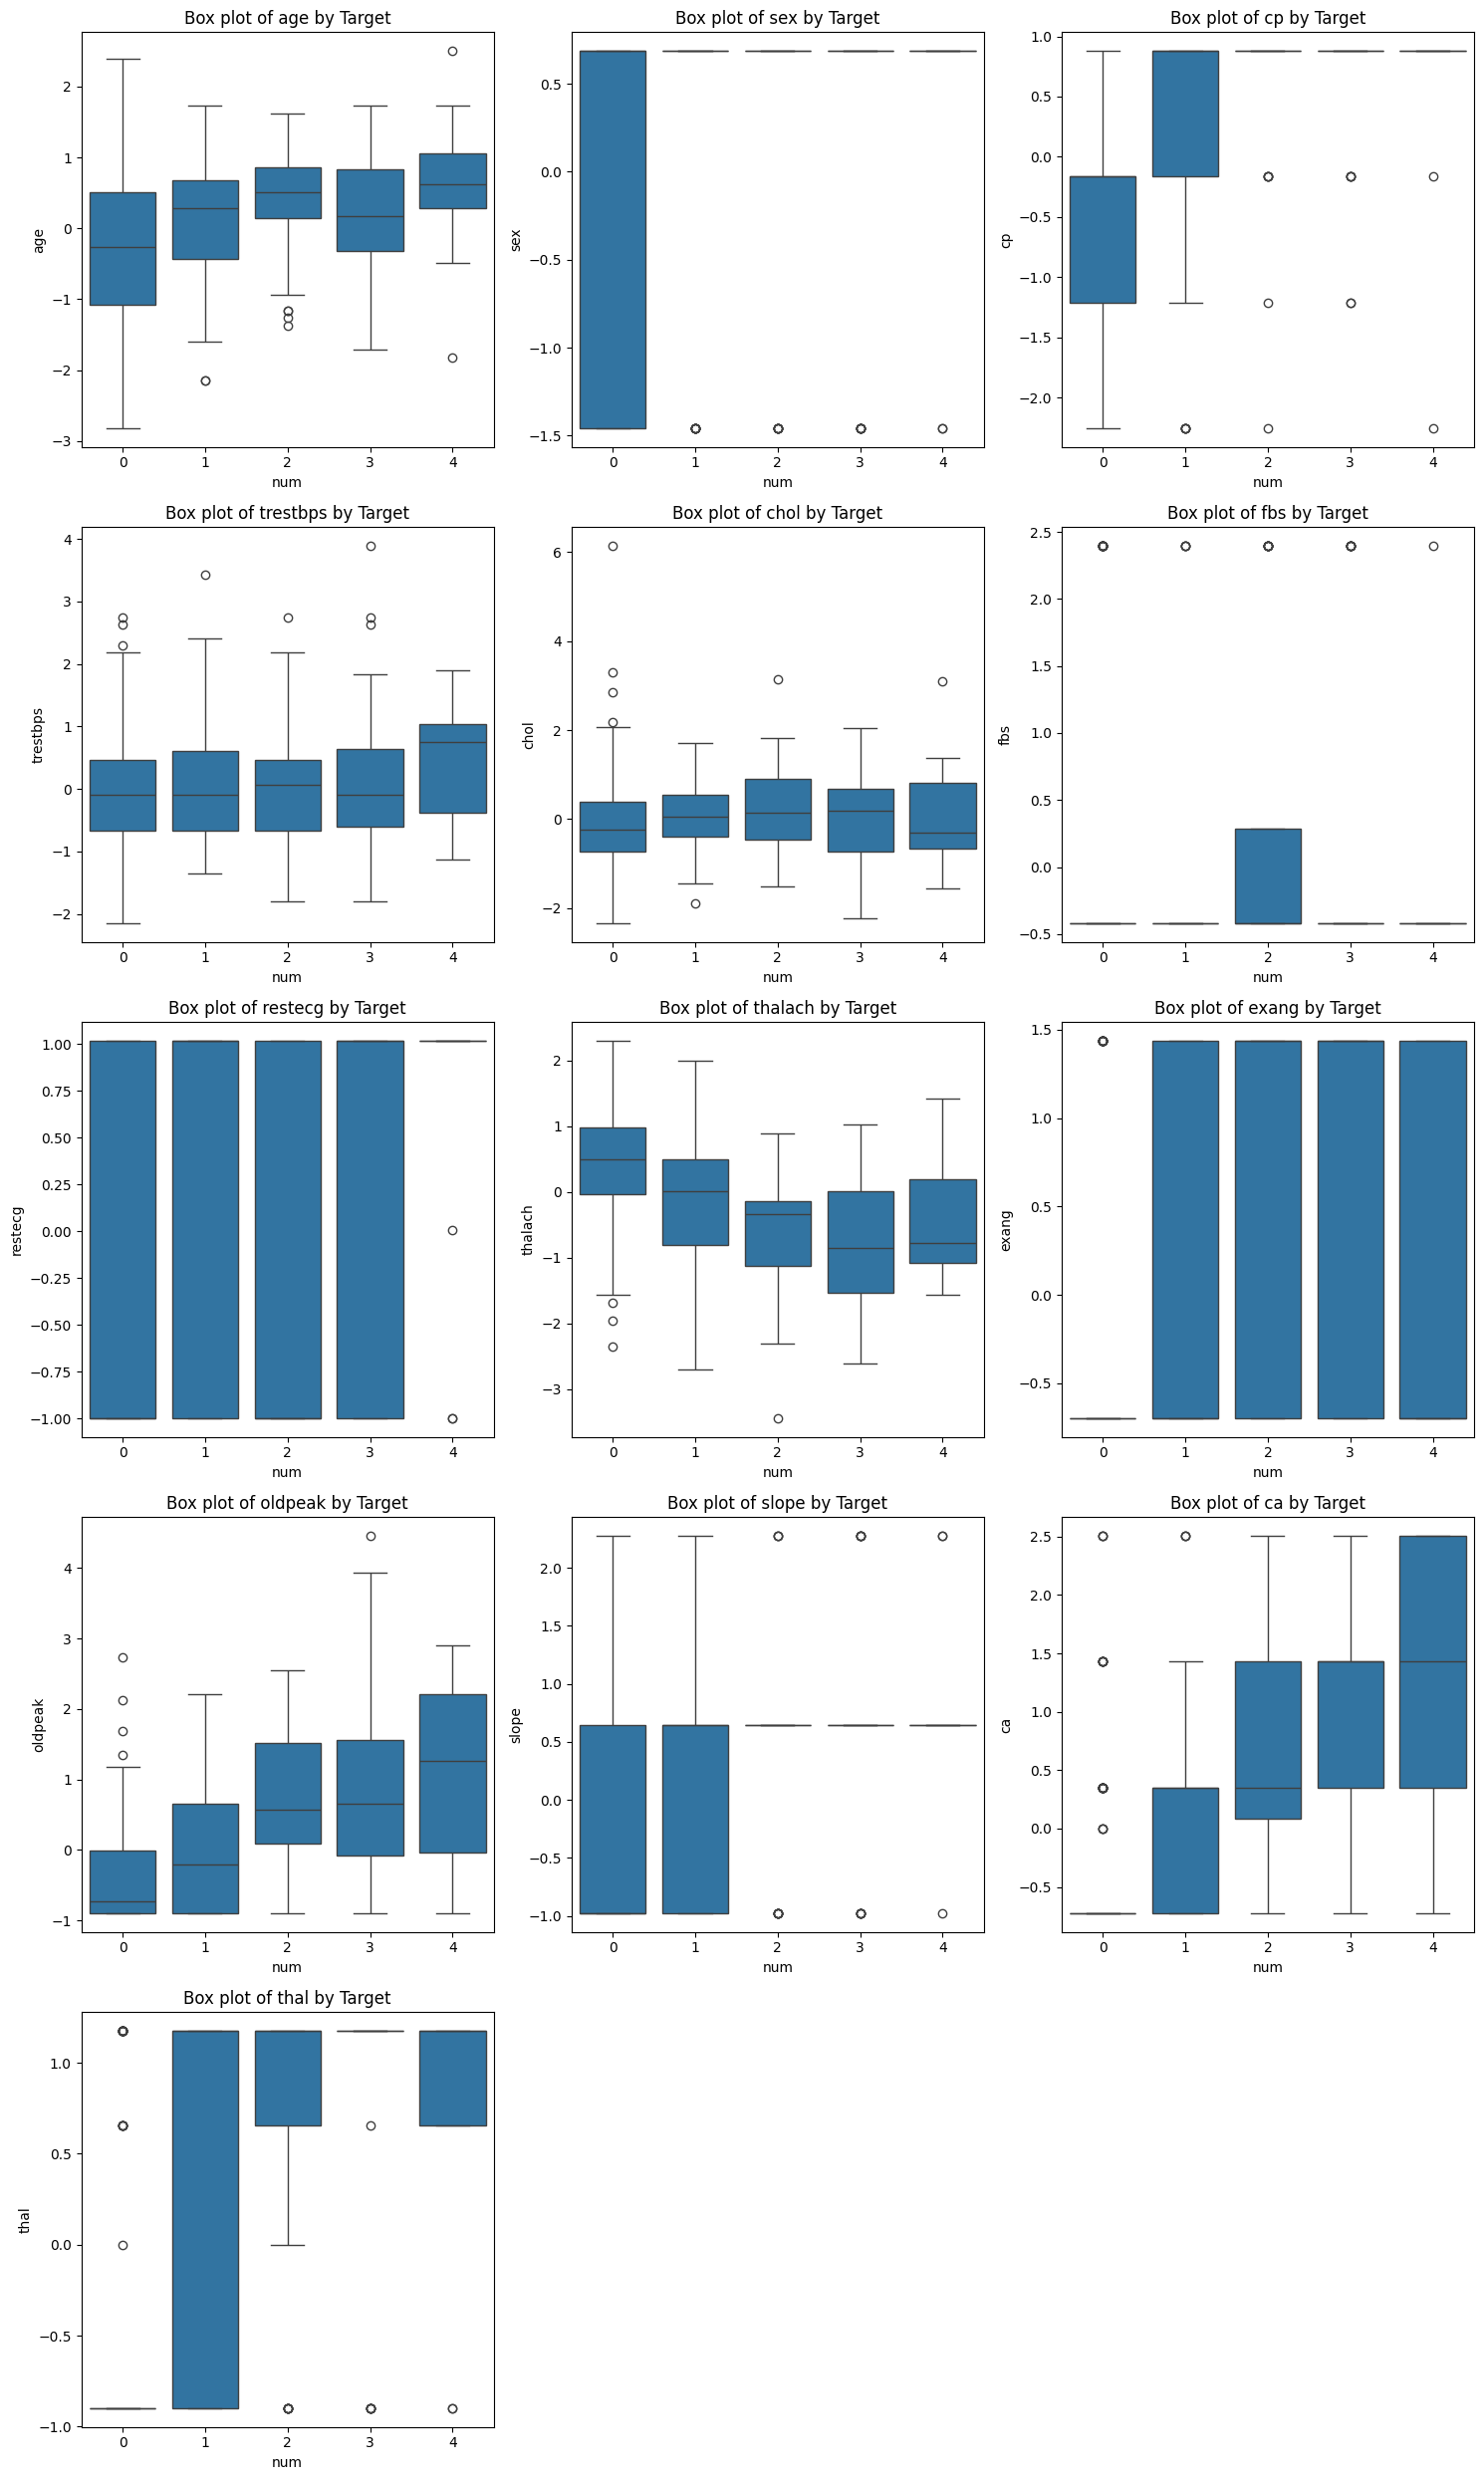

In [22]:
# Convert y to a Series if it has only one column
y_series = y.iloc[:, 0]  # Select the first (and only) column from y

# Set up the number of columns for the subplot grid
num_columns = 3  # Number of plots per row
num_rows = (len(X.columns) + num_columns - 1) // num_columns  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 5 * num_rows))
axes = axes.flatten()  # Flatten to 1D array for easy indexing

for idx, column in enumerate(X.columns):
    sns.boxplot(x=y_series, y=X[column], ax=axes[idx])
    axes[idx].set_title(f'Box plot of {column} by Target')

# Hide any empty subplots
for idx in range(len(X.columns), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

### Correlation Analysis

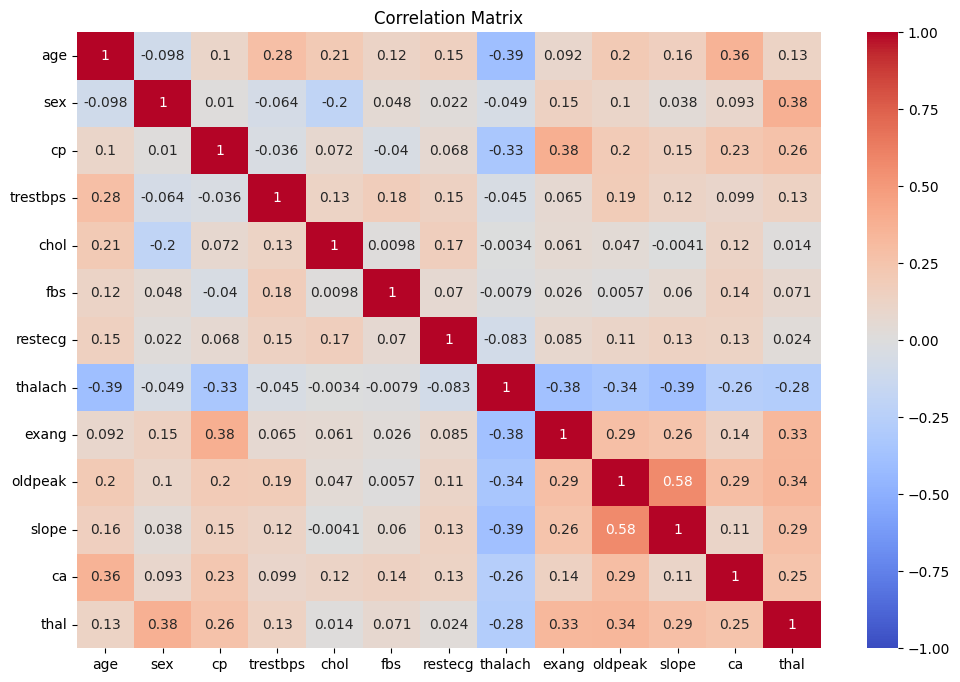

In [23]:
# Correlation Matrix

correlation_matrix = X.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [24]:
# Target correlation

y_series = y.iloc[:, 0]  # Convert to Series by selecting the only column
correlations_with_target = X.corrwith(y_series)
print(correlations_with_target)

age         0.222853
sex         0.224469
cp          0.407075
trestbps    0.157754
chol        0.070909
fbs         0.059186
restecg     0.183696
thalach    -0.415040
exang       0.397057
oldpeak     0.504092
slope       0.377957
ca          0.517390
thal        0.508799
dtype: float64


### Multivariate Analysis

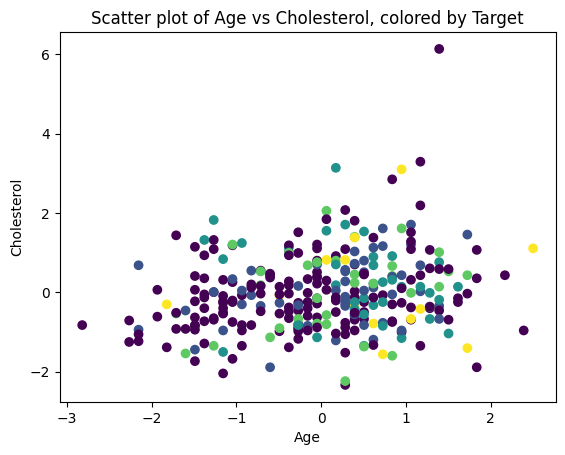

In [25]:
# PCA

# Convert y to a Series if it's a single-column DataFrame
y_series = y.iloc[:, 0] if isinstance(y, pd.DataFrame) else y

# Now use y_series for the color argument
plt.scatter(X['age'], X['chol'], c=y_series)
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('Scatter plot of Age vs Cholesterol, colored by Target')
plt.show()

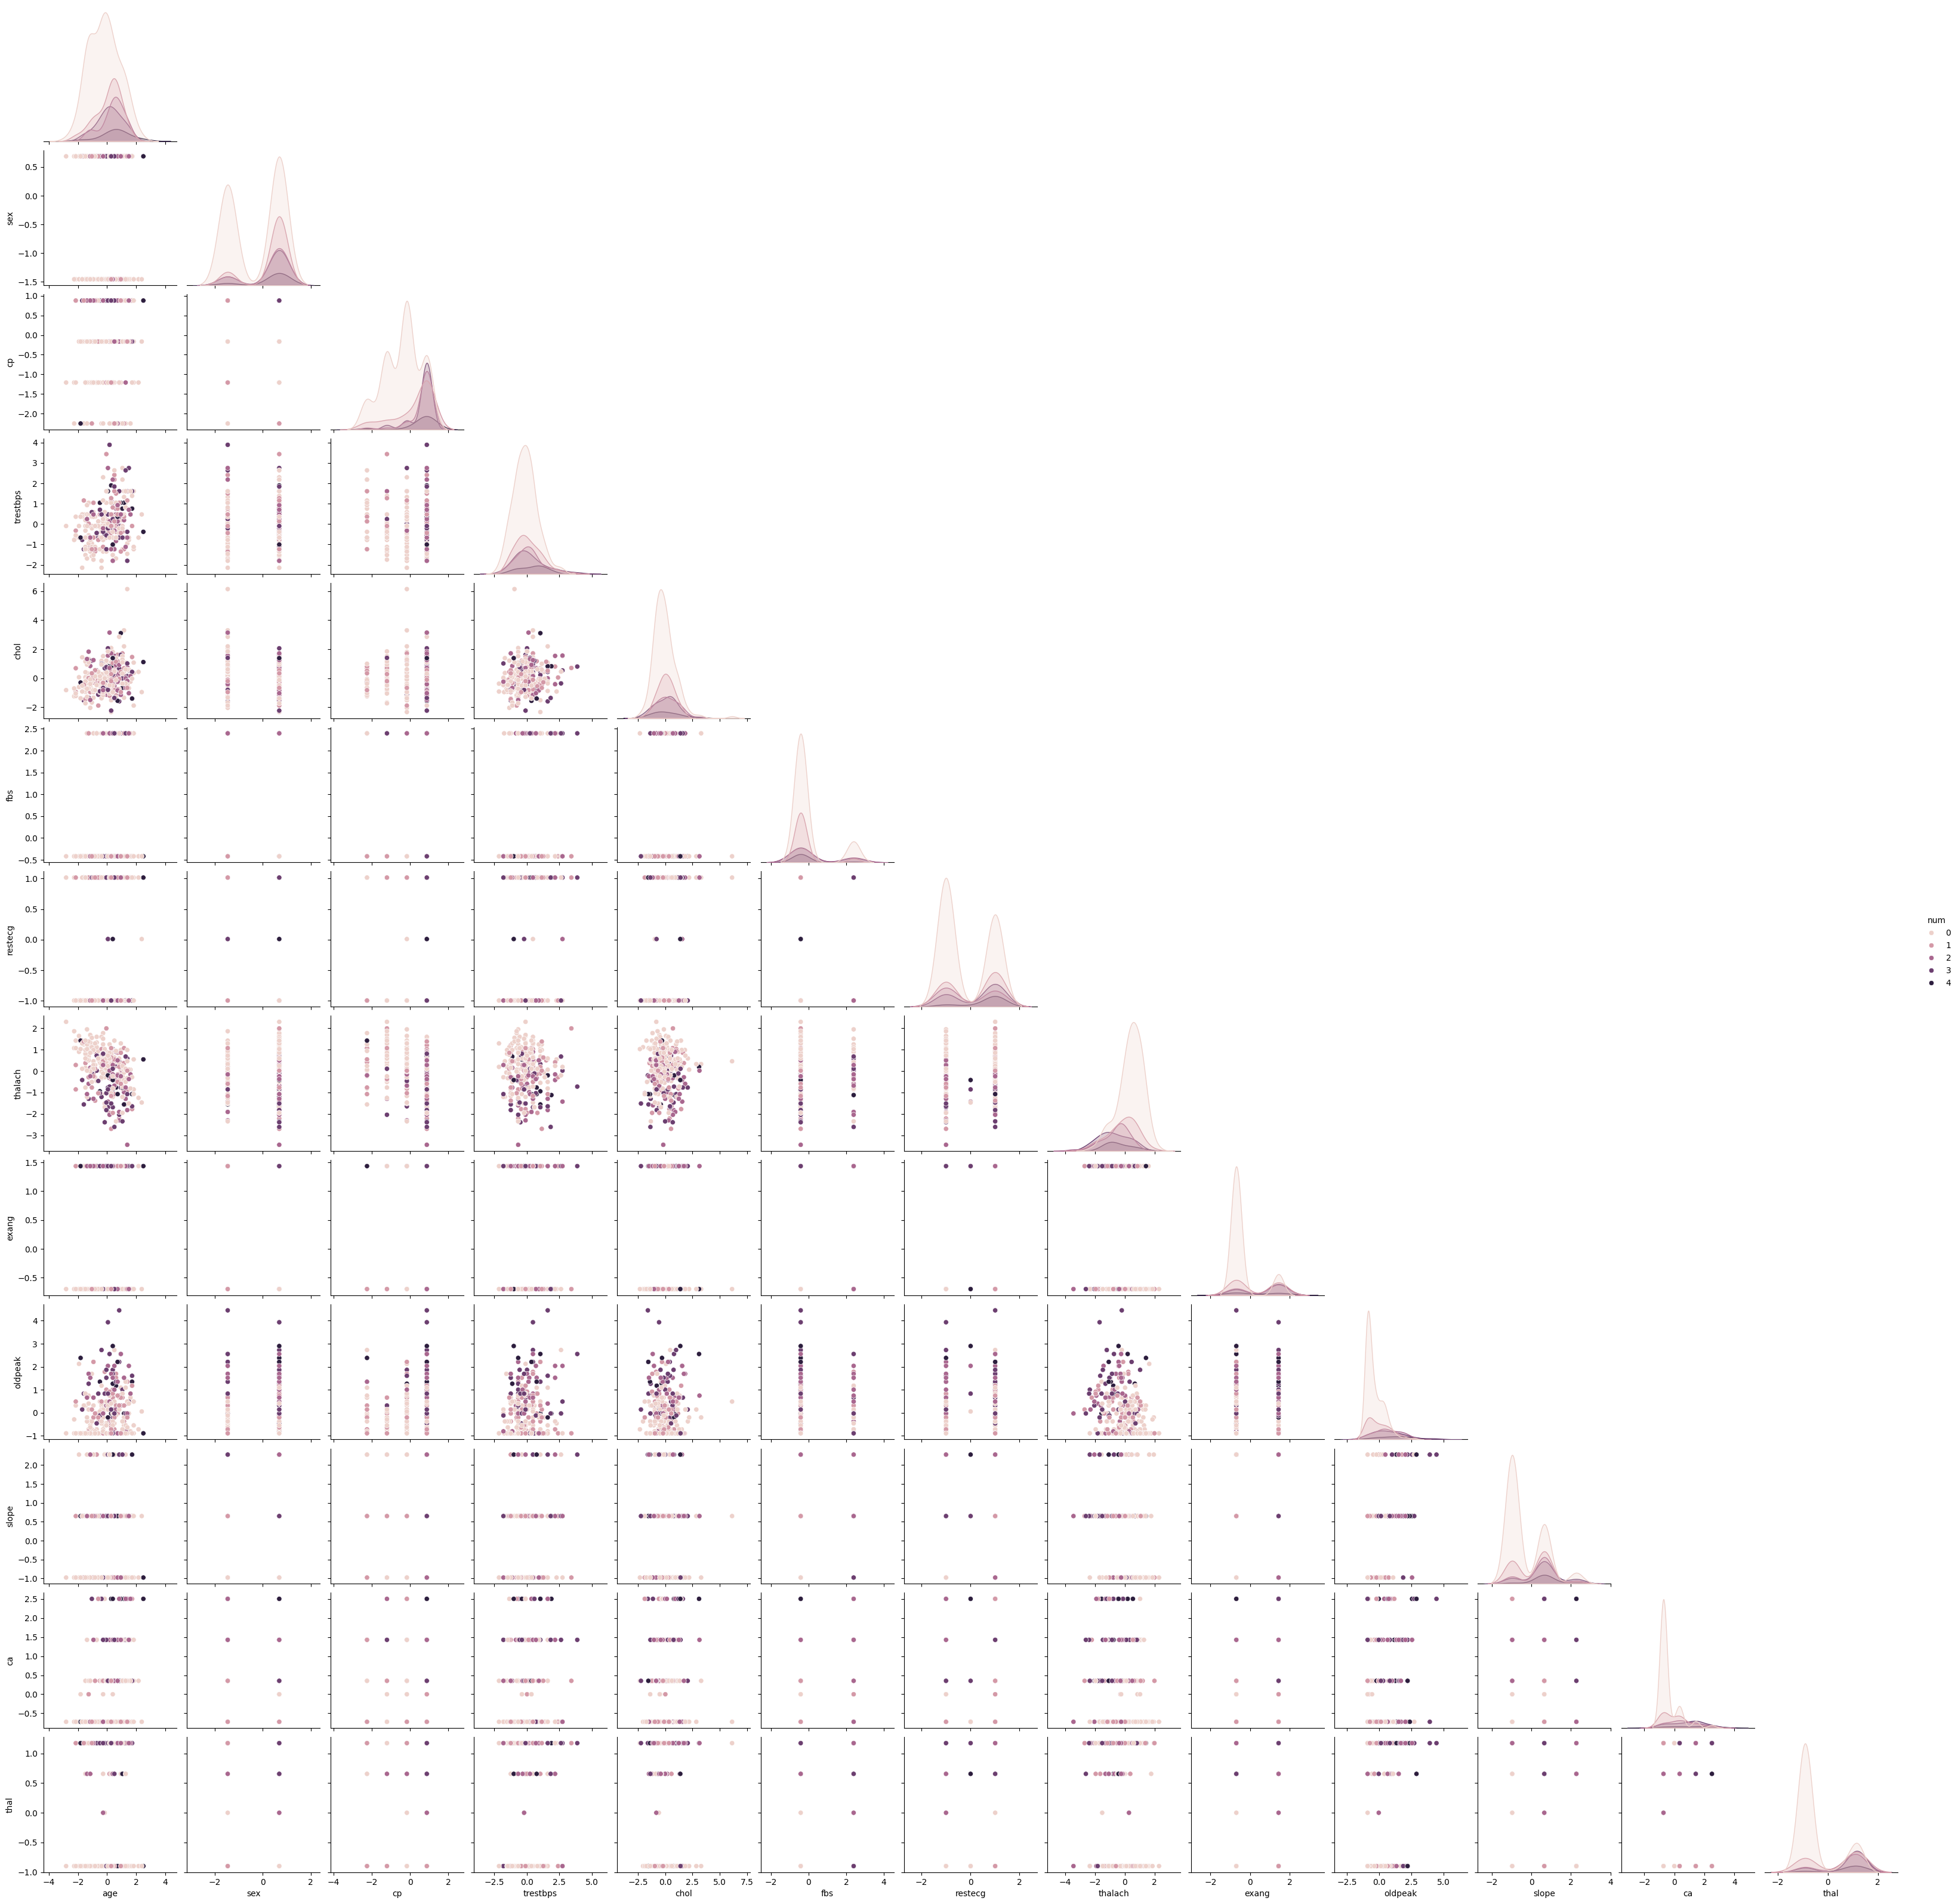

In [26]:
sns.pairplot(pd.concat([X, y], axis=1), hue=target_column, corner=True)

## Saving Preprocessed Data

In [27]:
import os
from google.colab import files

# Create the directory if it does not exist

os.makedirs('/data/preprocessed', exist_ok=True)

# Save the data to a CSV file

X.to_csv('/data/preprocessed.csv', index=False)

# Download the train files

files.download('/data/preprocessed.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Clustering

### Apply K-Means

In [28]:
# import the data to b usd
df = pd.read_csv('/data/preprocessed.csv')

# print the first 5 rows
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.948726,0.686202,-2.251775,0.757525,-0.264900,2.394438,1.016684,0.017197,-0.696631,1.087338,2.274579,-0.723095,0.655818
1,1.392002,0.686202,0.877985,1.611220,0.760415,-0.417635,1.016684,-1.821905,1.435481,0.397182,0.649113,2.503851,-0.898522
2,1.392002,0.686202,0.877985,-0.665300,-0.342283,-0.417635,1.016684,-0.902354,1.435481,1.346147,0.649113,1.428203,1.173931
3,-1.932564,0.686202,-0.165268,-0.096170,0.063974,-0.417635,-0.996749,1.637359,-0.696631,2.122573,2.274579,-0.723095,-0.898522
4,-1.489288,-1.457296,-1.208521,-0.096170,-0.825922,-0.417635,1.016684,0.980537,-0.696631,0.310912,-0.976352,-0.723095,-0.898522


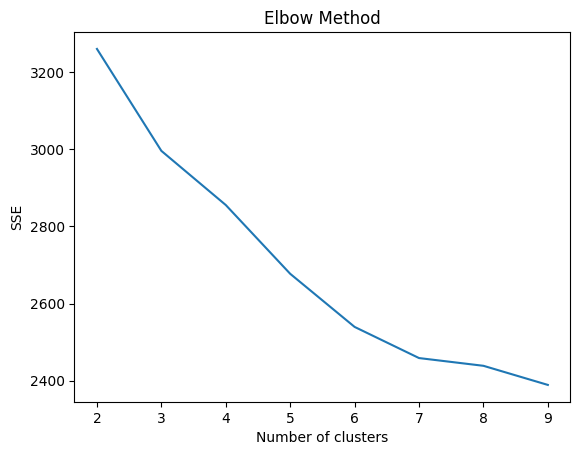

Silhouette Score for K-means: 0.12857066474100456


In [29]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Find optimal k using elbow method
sse = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

plt.plot(range(2, 10), sse)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

# Fit K-means with optimal k (e.g., k = 3)
optimal_k = 3  # Based on elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(df)

# Calculate silhouette score
sil_score = silhouette_score(df, kmeans_labels)
print(f'Silhouette Score for K-means: {sil_score}')

### Hierarchical Clustering

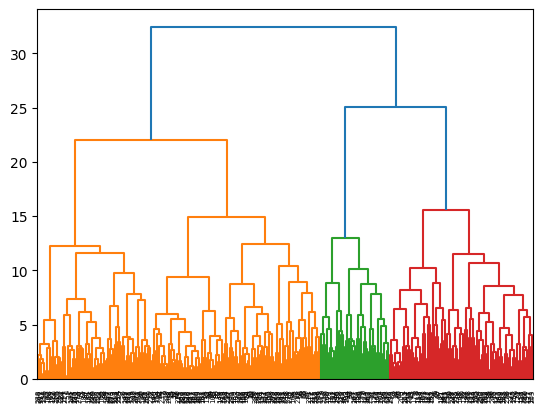

Silhouette Score for Hierarchical Clustering: 0.16236797080239315


In [30]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Hierarchical clustering
linked = linkage(df, method='ward')
dendrogram(linked)
plt.show()

# Fit Agglomerative Clustering
agg_clust = AgglomerativeClustering(n_clusters=optimal_k)
agg_labels = agg_clust.fit_predict(df)

# Calculate silhouette score
sil_score_agg = silhouette_score(df, agg_labels)
print(f'Silhouette Score for Hierarchical Clustering: {sil_score_agg}')

### DBSCAN

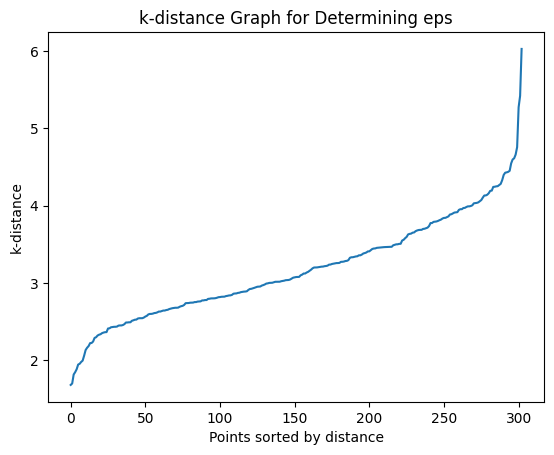

In [31]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Set min_samples as needed, typically around the number of features
min_samples = 13

# Compute the k-nearest neighbors distances
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(df)
distances, indices = neighbors_fit.kneighbors(df)

# Sort distances for the k-distance plot
distances = np.sort(distances[:, -1], axis=0)
plt.plot(distances)
plt.ylabel("k-distance")
plt.xlabel("Points sorted by distance")
plt.title("k-distance Graph for Determining eps")
plt.show()

In [32]:
from sklearn.cluster import KMeans, DBSCAN

# Set eps and min_samples based on data characteristics (tune as needed)
dbscan = DBSCAN(eps=4, min_samples=13)
dbscan_labels = dbscan.fit_predict(df)

# Check for number of clusters and noise points
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)
print(f"DBSCAN found {n_clusters} clusters and {n_noise} noise points.")

DBSCAN found 1 clusters and 4 noise points.


### Applying PCA for Visualization

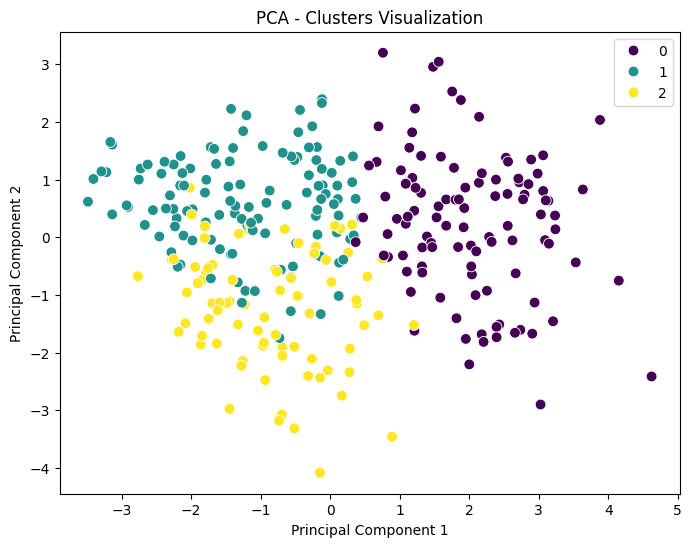

Explained variance by each component: [0.23668957 0.12299426]
Total variance explained by first 2 components: 0.3596838294687937


In [33]:
# Apply PCA to reduce dimensions to 2 components
pca = PCA(n_components=2)
data_pca = pca.fit_transform(df)

# Plot the clusters in the PCA-reduced space (use K-means, DBSCAN, or hierarchical labels here)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=kmeans_labels, palette="viridis", s=60)
plt.title("PCA - Clusters Visualization")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# Show explained variance
print(f"Explained variance by each component: {pca.explained_variance_ratio_}")
print(f"Total variance explained by first 2 components: {sum(pca.explained_variance_ratio_)}")

**Conclusion**

The PCA chart show a visual representation of clusters within the data after dimensionality reduction. Here's the conclusion we can draw from this:

1. **Clusters Separation**: The PCA visualization clearly shows three distinct clusters in the reduced 2-dimensional space. This implies that the original data, when reduced, still retains significant variance, allowing the clusters to be well-separated.
   
2. **Dimensionality Reduction**: The PCA reduced the dimensions to two principal components, which are the axes in the scatter plot. These components capture the most variance in the data, enabling easier visualization and analysis of the clustering results.
   
3. **Explained Variance**: The printed explained variance ratio tells us how much of the total variance in the data is captured by each principal component. A high cumulative explained variance for the first two components indicates that these two dimensions effectively capture most of the information in the dataset, validating the use of 2D visualization for clustering.



### Using t-SNE for Nonlinear Visualization

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


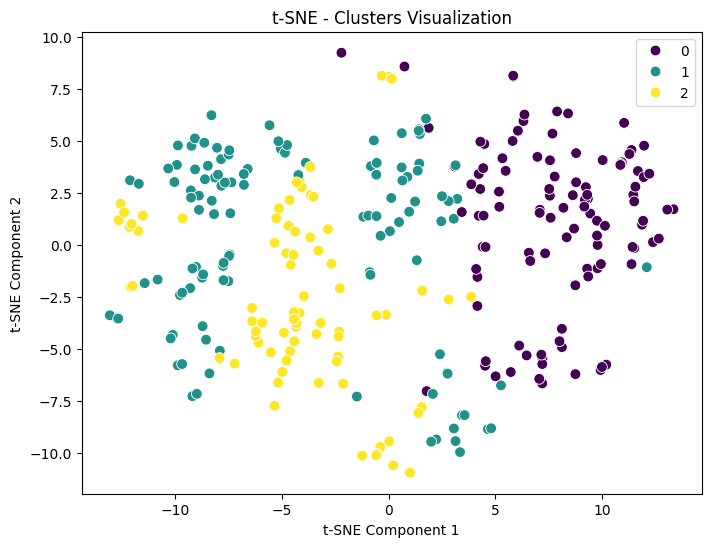

In [34]:
from sklearn.manifold import TSNE

# Apply t-SNE to reduce to 2D for visualization
tsne = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=42)
data_tsne = tsne.fit_transform(df)

# Plot the clusters in the t-SNE-reduced space
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_tsne[:, 0], y=data_tsne[:, 1], hue=kmeans_labels, palette="viridis", s=60)
plt.title("t-SNE - Clusters Visualization")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()

**Conclusion**

The t-SNE chart provides another perspective on the clusters within the data:

1. **Cluster Separation**: t-SNE often provides a more nuanced view of cluster separation compared to PCA, particularly for high-dimensional data. In this visualization, three clusters are evident, with some overlap between them, which may suggest complex relationships between the data points.

2. **Local and Global Structure**: t-SNE emphasizes the local structure of the data, meaning it aims to keep similar points close together in the lower-dimensional space. This can help to reveal finer details within the clusters that PCA might not capture as effectively.

3. **Cluster Insights**: The separation between clusters suggests that the algorithm (likely K-means) found distinct groups within the data. The clusters' relative positioning and spread provide insights into how different or similar the groups are in terms of their original features.

4. **t-SNE's Limitations**: While t-SNE provides valuable insights, it doesn't preserve the global structure of the data as well as PCA. Therefore, while we can see distinct clusters, we should be cautious about inferring too much about the overall relationships between clusters.


### Gaussian mixture models (GMMs)

#### Fit a Gaussian Mixture Model

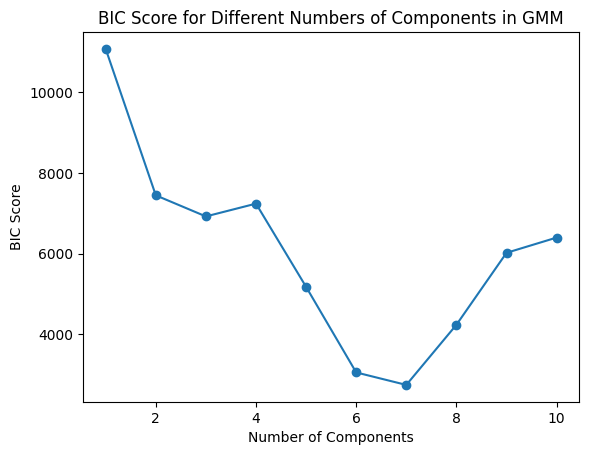

In [35]:
from sklearn.mixture import GaussianMixture

# Choose the number of components for GMM based on BIC
bic_scores = []
n_components_range = range(1, 11)
for n in n_components_range:
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm.fit(df)
    bic_scores.append(gmm.bic(df))

# Plot BIC scores to find the optimal number of components
plt.plot(n_components_range, bic_scores, marker='o')
plt.xlabel("Number of Components")
plt.ylabel("BIC Score")
plt.title("BIC Score for Different Numbers of Components in GMM")
plt.show()

# Select the optimal number of components (e.g., lowest BIC score)
optimal_n_components = n_components_range[np.argmin(bic_scores)]
gmm = GaussianMixture(n_components=optimal_n_components, random_state=42)
gmm_labels = gmm.fit_predict(df)

#### Cluster Interpretation

In [36]:
# Add GMM cluster labels to the original data
df['GMM_Cluster'] = gmm_labels

# Calculate mean values of each feature within each GMM cluster
cluster_means = df.groupby('GMM_Cluster').mean()
print("Mean values of features in each GMM cluster:")
print(cluster_means)

Mean values of features in each GMM cluster:
                  age       sex        cp  trestbps      chol       fbs  \
GMM_Cluster                                                               
0            0.641843 -0.797758  0.877985  1.331033  0.264871  1.529185   
1           -0.448338 -0.397589 -0.305931 -0.228540 -0.066010 -0.417635   
2            0.483287 -1.457296 -0.373919 -0.056331  0.479904 -0.417635   
3            0.125501  0.243893  0.877985  0.013139  0.013922 -0.417635   
4            0.213012  0.269411 -0.339143  0.159939 -0.006959  2.394438   
5            0.005269  0.686202 -0.320346 -0.100015 -0.201112 -0.417635   
6            0.740941 -0.117609  0.486765  0.622357  0.886161 -0.417635   

              restecg   thalach     exang   oldpeak     slope        ca  \
GMM_Cluster                                                               
0            0.397166 -0.420684 -0.040596  1.405872  1.024221  1.593687   
1           -0.171015  0.485091 -0.696631 -0.403477 -0

#### Risk Factor Identification

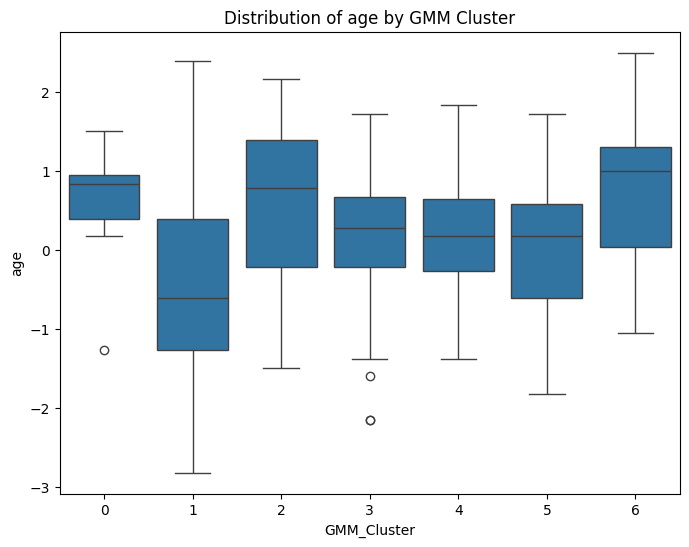

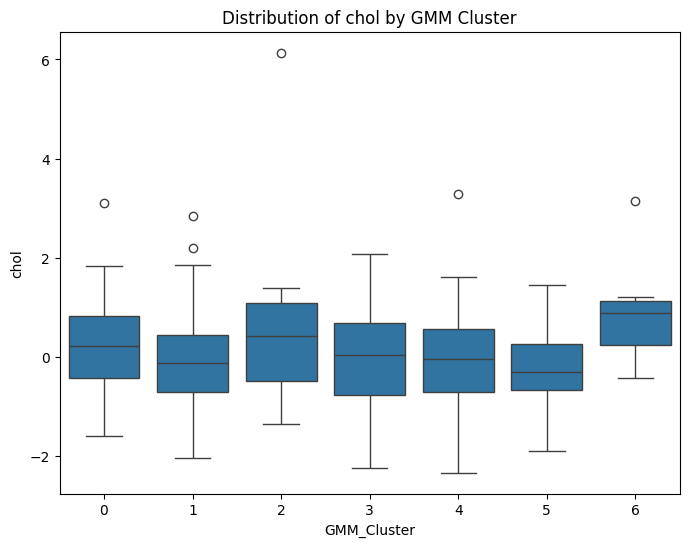

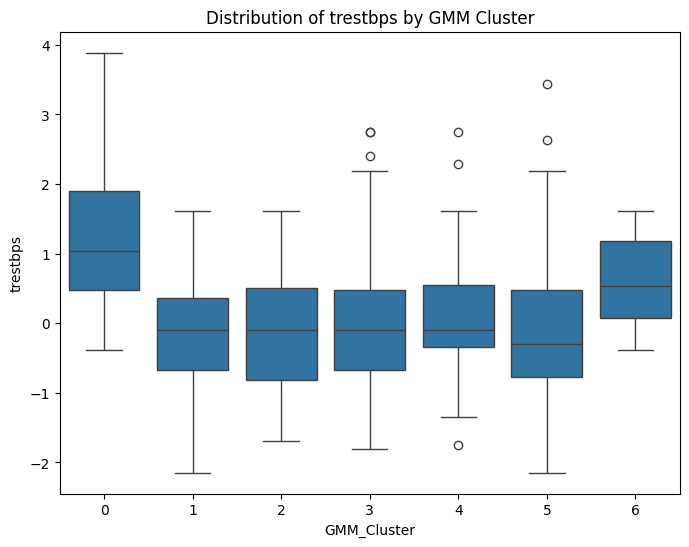

In [37]:
# Example: Plot distributions of potential risk factors across GMM clusters

for feature in ['age', 'chol', 'trestbps']:  # Add other relevant features as needed
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='GMM_Cluster', y=feature, data=df)
    plt.title(f"Distribution of {feature} by GMM Cluster")
    plt.show()

# If a target variable exists, calculate the risk (heart disease presence) per cluster
if 'target' in df.columns:
    heart_disease_risk = df.groupby('GMM_Cluster')['target'].mean()
    print("Heart disease risk (mean of target) in each GMM cluster:")
    print(heart_disease_risk)

### Perfomance Evaluation

In [38]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Use GMM labels (or any other clustering labels) for evaluation
gmm_labels = df['GMM_Cluster']

# Calculate Silhouette Score
silhouette_avg = silhouette_score(df, gmm_labels)
print(f"Silhouette Score: {silhouette_avg:.2f}")

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(df, gmm_labels)
print(f"Davies-Bouldin Index: {db_index:.2f}")

Silhouette Score: 0.15
Davies-Bouldin Index: 2.02


### **Conclusion**

A Silhouette Score of 0.15 and Davies-Bouldin Index of 2.02 indicate that the clustering performance may not be very strong, suggesting that clusters are not well-separated or cohesive.

**Clustering Evaluation Metrics**

This document provides an interpretation of key clustering evaluation metrics used to assess the quality of clustering results, including the Silhouette Score and the Davies-Bouldin Index.

### 1. Interpretation of the Silhouette Score

A **Silhouette Score** of 0.15 is relatively low, which may indicate issues with cluster separation. Generally, the interpretation of Silhouette Scores is as follows:

- **Scores close to 1**: Indicate well-separated clusters.
- **Scores around 0**: Suggest that clusters overlap or that points are near the boundary between clusters.
- **Negative values**: Indicate that points may be assigned to incorrect clusters.

#### With a Silhouette Score of 0.15:
- Many points are close to cluster boundaries, suggesting significant overlap between clusters.
- Clusters may lack distinct boundaries or there could be an excessive number of clusters, resulting in overlap.

### 2. Interpretation of the Davies-Bouldin Index

A **Davies-Bouldin Index** of 2.02 is relatively high. The Davies-Bouldin Index generally interprets as follows:

- **Lower values**: Indicate compact, well-separated clusters.
- **Higher values**: Suggest less distinct clusters or clusters that are too dispersed.

#### With a Davies-Bouldin Index of 2.02:
- Clusters may be widely spread out or not well-separated.
- There could be significant overlap, implying that clusters are not clearly defined.

---

These interpretations help in assessing the quality and structure of clusters and guide potential adjustments to improve clustering outcomes.

### Comparison

In [39]:
# Fit K-means with an optimized number of clusters (e.g., based on the elbow method)
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(df)

# Calculate evaluation metrics
kmeans_silhouette = silhouette_score(df, kmeans_labels)
kmeans_davies_bouldin = davies_bouldin_score(df, kmeans_labels)

In [40]:
# Fit GMM with an optimized number of components (based on BIC score)
gmm = GaussianMixture(n_components=optimal_n_components, random_state=42)
gmm_labels = gmm.fit_predict(df)

# Calculate evaluation metrics
gmm_silhouette = silhouette_score(df, gmm_labels)
gmm_davies_bouldin = davies_bouldin_score(df, gmm_labels)

In [41]:
# Fit Hierarchical Clustering with optimal number of clusters
hierarchical = AgglomerativeClustering(n_clusters=optimal_k)
hierarchical_labels = hierarchical.fit_predict(df)

# Calculate evaluation metrics
hierarchical_silhouette = silhouette_score(df, hierarchical_labels)
hierarchical_davies_bouldin = davies_bouldin_score(df, hierarchical_labels)

In [42]:
# Filter out noise points labeled as -1
filtered_data = X[dbscan_labels != -1]
filtered_labels = dbscan_labels[dbscan_labels != -1]

# Check if there are at least two unique labels
if len(set(filtered_labels)) > 1:
    dbscan_silhouette = silhouette_score(filtered_data, filtered_labels)
    dbscan_davies_bouldin = davies_bouldin_score(filtered_data, filtered_labels)
    print("Silhouette Score:", dbscan_silhouette)
    print("Davies-Bouldin Score:", dbscan_davies_bouldin)
else:
    print("Cannot compute silhouette or Davies-Bouldin scores: less than two clusters found.")

Cannot compute silhouette or Davies-Bouldin scores: less than two clusters found.


In [43]:
# Display metrics for comparison
print("Clustering Performance Comparison:")
print(f"K-means - Silhouette Score: {kmeans_silhouette:.2f}, Davies-Bouldin Index: {kmeans_davies_bouldin:.2f}")
print(f"GMM - Silhouette Score: {gmm_silhouette:.2f}, Davies-Bouldin Index: {gmm_davies_bouldin:.2f}")
print(f"Hierarchical - Silhouette Score: {hierarchical_silhouette:.2f}, Davies-Bouldin Index: {hierarchical_davies_bouldin:.2f}")

Clustering Performance Comparison:
K-means - Silhouette Score: 0.20, Davies-Bouldin Index: 1.94
GMM - Silhouette Score: 0.13, Davies-Bouldin Index: 2.01
Hierarchical - Silhouette Score: 0.19, Davies-Bouldin Index: 2.02


# Clustering Performance Comparison

The clustering performance comparison suggests that none of the clustering algorithms achieved very high scores. This implies that the clusters in the dataset are not well-separated or that the data may not have a clear clustering structure. Here’s a detailed breakdown of each algorithm’s performance based on the **Silhouette Score** and **Davies-Bouldin Index**.

## 1. K-means Clustering

- **Silhouette Score**: 0.20  
  This score is low, indicating that the clusters are not well-separated. Many data points may be close to the boundary of their assigned clusters, suggesting that the clusters are likely overlapping or ambiguous.

- **Davies-Bouldin Index**: 1.94  
  A Davies-Bouldin Index close to 2.0 suggests that the clusters are not compact or distinct. This implies that the K-means algorithm struggled to create well-defined clusters, possibly due to the data not naturally forming spherical clusters, which K-means handles best.

## 2. Gaussian Mixture Model (GMM)

- **Silhouette Score**: 0.13  
  This score is lower than that of K-means, suggesting that many points are not well assigned to a single cluster. GMM often works well for data with elliptical or overlapping clusters, but a score of 0.13 indicates that GMM did not find distinct cluster boundaries in this data.

- **Davies-Bouldin Index**: 2.01  
  A higher index than K-means, this value indicates that the clusters formed by GMM are more dispersed and less distinct. This suggests that the data does not have clear, separate Gaussian distributions, making it difficult for GMM to perform effectively.

## 3. Hierarchical Clustering

- **Silhouette Score**: 0.19  
  This score is slightly better than GMM’s but lower than K-means, indicating that points are not strongly cohesive within clusters. Hierarchical clustering is generally useful for data with nested clusters, but in this case, it does not seem to find well-defined structures either.

- **Davies-Bouldin Index**: 2.02  
  The highest index among the three, this suggests that the clusters formed by hierarchical clustering are relatively dispersed and not compact. This indicates that hierarchical clustering struggled to identify meaningful cluster structures in the data.

---

## Summary and Observations

Based on these metrics, here are some insights:

1. **K-means** performed slightly better than the other algorithms, with a higher Silhouette Score (0.20) and a slightly lower Davies-Bouldin Index (1.94). While the data may not have clear cluster boundaries, K-means was able to find moderately compact clusters better than GMM or Hierarchical Clustering. However, K-means may not be the ideal algorithm due to the low overall scores, indicating room for improvement.

2. **GMM and Hierarchical Clustering** performed worse in terms of both compactness and separation, as indicated by their lower Silhouette Scores and higher Davies-Bouldin Indexes. This suggests that the data might not conform to the assumptions of these algorithms (e.g., Gaussian distribution for GMM or hierarchical structure for Hierarchical Clustering).

---

## Conclusion

While **K-means** performed marginally better, the low Silhouette Scores and high Davies-Bouldin Indexes across all algorithms suggest that the data could have gotten a clearer, well-defined clustering structure in the preprocessing phase.